In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('data/WWSI 4-5.xls',skiprows=42,sheet_name='Results')

In [4]:
data.head()

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Baseline End,Amp Status,Comments,Cq Conf,Target Color,CQCONF,EXPFAIL,HIGHSD,DRNMIN,NOISE
0,1,A1,False,Blank,Blank,UNKNOWN,FAM,NFQ-MGB,29.489435,24.692120,...,22,Amp,NaN,0.307526,"RGB(0,139,69)",Y,N,Y,N,N
1,2,A2,False,NTC_10,B1_NTC,UNKNOWN,FAM,NFQ-MGB,37.442471,37.661343,...,30,Inconclusive,NaN,0.879550,"RGB(0,0,255)",N,N,Y,N,N
2,4,A4,False,1.1,10,UNKNOWN,FAM,NFQ-MGB,11.556807,11.651810,...,7,Amp,NaN,0.982278,"RGB(0,139,69)",N,N,N,N,N
3,5,A5,False,1.2,10,UNKNOWN,FAM,NFQ-MGB,11.810756,11.912842,...,8,Amp,NaN,0.985601,"RGB(0,139,69)",N,N,N,N,N
4,6,A6,False,1.3,10,UNKNOWN,FAM,NFQ-MGB,11.927703,11.953636,...,7,Amp,NaN,0.940883,"RGB(0,139,69)",N,N,N,N,N


In [5]:
amplification_data = pd.read_excel('data/WWSI 4-5.xls',skiprows=42,sheet_name='Amplification Data')

In [10]:
cycle = range(0,40)

wells = ['E','F','G']
numbers = ['10','11','12']

well_positions = []

for well in wells:
    for number in numbers:
        well_positions.append(str(well)+str(number))


qreps = ['qPCR Replicate 1','qPCR Replicate 2','qPCR Replicate 3']
treps = ['Technical Replicate 1','Technical Replicate 2','Technical Replicate 3']


replicates = []

for qrep in qreps:
    for trep in treps:
        replicates.append(trep + ', \n ' + qrep)

In [11]:
well_positions

['E10', 'E11', 'E12', 'F10', 'F11', 'F12', 'G10', 'G11', 'G12']

In [12]:
replicates

['Technical Replicate 1, \n qPCR Replicate 1',
 'Technical Replicate 2, \n qPCR Replicate 1',
 'Technical Replicate 3, \n qPCR Replicate 1',
 'Technical Replicate 1, \n qPCR Replicate 2',
 'Technical Replicate 2, \n qPCR Replicate 2',
 'Technical Replicate 3, \n qPCR Replicate 2',
 'Technical Replicate 1, \n qPCR Replicate 3',
 'Technical Replicate 2, \n qPCR Replicate 3',
 'Technical Replicate 3, \n qPCR Replicate 3']

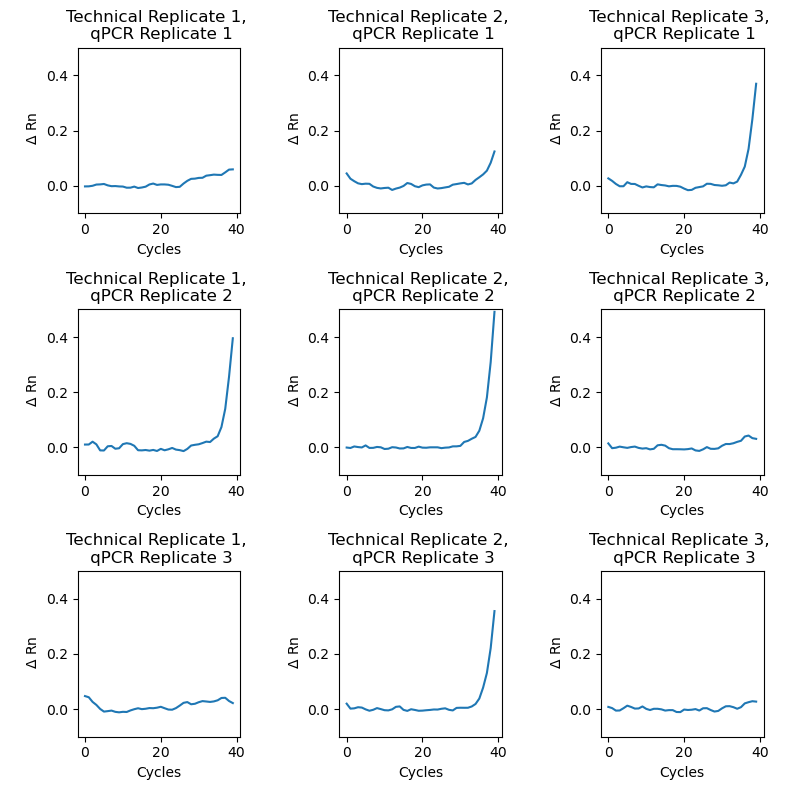

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

# Loop through the data and plot on each subplot
for i in range(0,9):
    row, col = i // 3, i % 3  # Calculate the row and column indices
    ax = axes[row, col]  # Get the current subplot
    ax.plot(cycle,amplification_data[amplification_data['Well Position']==well_positions[i]]['Delta Rn'])
#     ax.set_title(f'Subplot {i+1}')
    ax.set_title(replicates[i])
    ax.set_ylim(-0.1,0.5)
    ax.set_xlabel('Cycles')
    ax.set_ylabel('\n $\Delta$ Rn')

# Adjust the layout of the subplots to prevent overlapping titles and labels
plt.tight_layout()



# Show the plot
plt.savefig('negative_control_supplementary.png')

plt.show()